# Prediction of Doctor Consultaion fees

## Objective: 

To Predict the doctor consultaion fees based on Speciality, experience and area of doctor.



**Project Description: Prediction of Doctor Consultation Fees**

In the modern healthcare landscape, the cost of medical services is a critical factor for both patients and healthcare providers. The "Prediction of Doctor Consultation Fees" project aims to develop a predictive model that estimates the consultation fees charged by doctors based on various factors such as their medical specialization, years of experience, and practice area. By providing accurate fee predictions, this project can empower patients to make informed decisions about their healthcare expenses and help medical practitioners set competitive pricing.

**Project Objectives:**
1. Develop a predictive model: Create a machine learning model that uses features like doctor's speciality, years of experience, and practice area to predict the consultation fee.
2. Data collection and preprocessing: Gather relevant data on doctors' specialities, experience, practice areas, and corresponding consultation fees. Clean and preprocess the data to ensure accuracy and consistency.
3. Feature selection: Identify the most relevant features that have the greatest impact on the consultation fees.
4. Model training and evaluation: Train the predictive model using a suitable machine learning algorithm. Evaluate the model's performance using appropriate evaluation metrics.
5. Fine-tuning and optimization: Optimize the model's hyperparameters and architecture to improve prediction accuracy.
6. User interface (optional): Develop a user-friendly interface where users can input doctor details and receive estimated consultation fees in real-time.
7. Deployment: Deploy the trained model for practical use, either through a web application, API, or integration with a healthcare platform.

**Deliverables:**
1. Dataset: A clean and well-structured dataset containing information on doctors' specialities, experience, practice areas, and consultation fees.
2. Machine Learning Model: A trained predictive model capable of estimating doctor consultation fees.
3. Evaluation Report: Documentation of the model's performance, including metrics such as Mean Absolute Error, Root Mean Squared Error, etc.
4. Source Code: Well-documented Python code for data preprocessing, model training, and prediction.
5. User Interface (optional): If applicable, a user interface allowing users to input doctor details and receive fee predictions.
6. Deployment (optional): Deployed model accessible through a web application, API, or integration.

**Business Need:**

- Address the growing demand for cost transparency in healthcare.
- Empower patients with accurate estimates to make informed decisions.
- Improve patient satisfaction and overall healthcare experience.
- Enable doctors to set competitive and fair consultation fees based on market trends.

**Scope:**

- The project will focus on predicting doctor consultation fees based on the specified features, and the scope may not include predicting fees for specific medical procedures or treatments.
- May incorporate additional variables for enhanced prediction accuracy.
- The project will not address real-time fluctuations in fees due to factors such as market demand, location-based variations, or doctor reputation.
variations, or doctor reputation.

**Assumptions and Limitations:**
- The accuracy of the prediction may vary based on the available data and the complexity of the relationship between features and fees.
- The model assumes that the provided features (speciality, experience, practice area) are the primary factors influencing consultation fees.

**Future Enhancements:**
- Integration with a wider range of features, such as doctor qualifications, patient reviews, and clinic facilities, to improve prediction accuracy.
- Integration with external APIs or databases to provide real-time updates on medical fee trends and market fluctuations.

**Conclusion:**
The "Prediction of Doctor Consultation Fees" project aims to create a valuable tool for patients seeking transparent and reliable cost estimates for medical consultations. By leveraging machine learning techniques, the project contributes to informed decision-making in healthcare expenses and potentially facilitates a fairer pricing structure within the medical industry.

In [145]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [146]:
#import dataset
# The dataset is obtained from an online platform that connects patients with healthcare providers
dataset= pd.read_csv('https://raw.githubusercontent.com/raviteja-padala/Datasets/main/doctors_hyd.csv')

In [147]:
#viewing top 5 records
dataset.head()

,Name,Speciality,Years_of_Experience,Area,Consultation_fee,Patient_stories
0,M,Ayurveda,24.0,"overallAmeerpet, Hyderabad",500.0,65.0
1,C Narmada,Ayurveda,23.0,"overallShaikpet, Hyderabad",500.0,18.0
2,Priti Thakre,Ayurveda,21.0,"overallKPHB, Hyderabad",500.0,11.0
3,Alivelu Manga,Ayurveda,25.0,"Nagar, Hyderabad",299.0,9.0
4,G,Ayurveda,18.0,"overallKukatpally, Hyderabad",500.0,53.0


In [148]:
#shape of dataset
dataset.shape

(1458, 6)

In [149]:
#information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1442 non-null   object 
 1   Speciality           1458 non-null   object 
 2   Years_of_Experience  1407 non-null   float64
 3   Area                 1359 non-null   object 
 4   Consultation_fee     1396 non-null   float64
 5   Patient_stories      744 non-null    float64
dtypes: float64(3), object(3)
memory usage: 68.5+ KB


# Feature wise Data Analysis

## Speciality column

In [150]:
dataset['Speciality'].nunique()

15

In [151]:
dataset['Speciality'].value_counts()

Dentist               244
Physiotherapist       196
General physician     157
Gynecologist          142
Psychiatrist          122
Ayurveda              105
Dermatologist          97
Orthopedic             91
Pediatrician           59
Cardiology             56
Homeopathy             45
ENT                    41
Neurologist            40
Urologist              35
Gastroenterologist     28
Name: Speciality, dtype: int64

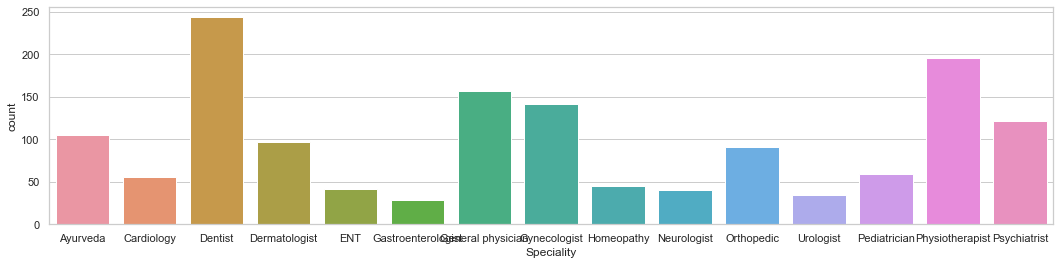

In [152]:
plt.figure(figsize=(18,4))
sns.countplot(dataset['Speciality'])
plt.show()

<span style='color:Blue'> *Observation:* </span>

- Dentists, General Physicians , Gynecologists are more in the dataset.

## Years_of_Experience column

In [153]:
print(dataset['Years_of_Experience'].value_counts().to_dict())

{13.0: 103, 11.0: 95, 12.0: 89, 14.0: 86, 10.0: 80, 15.0: 68, 20.0: 58, 17.0: 57, 16.0: 55, 9.0: 53, 19.0: 45, 18.0: 42, 7.0: 41, 8.0: 40, 22.0: 38, 24.0: 36, 21.0: 36, 26.0: 35, 23.0: 32, 25.0: 28, 27.0: 26, 6.0: 23, 29.0: 21, 5.0: 19, 4.0: 16, 33.0: 15, 28.0: 14, 30.0: 14, 32.0: 14, 34.0: 13, 36.0: 13, 3.0: 11, 41.0: 9, 37.0: 8, 42.0: 7, 35.0: 7, 40.0: 7, 44.0: 6, 39.0: 6, 43.0: 6, 47.0: 5, 46.0: 4, 45.0: 4, 31.0: 4, 38.0: 4, 2.0: 3, 51.0: 3, 52.0: 2, 48.0: 2, 55.0: 2, 68.0: 1, 53.0: 1}


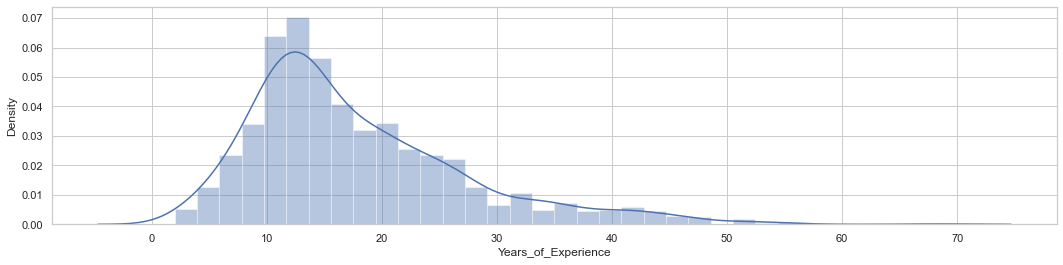

In [154]:
plt.figure(figsize=(18,4))
sns.distplot(dataset['Years_of_Experience'])
plt.show()

<span style='color:Blue'> *Observation:* </span>

- Doctors with experiance range of 10 - 20 years are more in the dataset.

## Area column

In [155]:
print(dataset['Area'].value_counts().to_dict())

{'Hills, Hyderabad': 178, 'Nagar, Hyderabad': 112, 'overallGachibowli, Hyderabad': 96, 'overallKondapur, Hyderabad': 70, 'overallKukatpally, Hyderabad': 43, 'City, Hyderabad': 39, 'overallMadhapur, Hyderabad': 35, 'overallSecunderabad, Hyderabad': 34, 'overallManikonda, Hyderabad': 34, 'overallKPHB, Hyderabad': 32, 'overallAmeerpet, Hyderabad': 25, 'Road, Hyderabad': 22, 'overallMadinaguda, Hyderabad': 20, 'Banjara Hills': 19, 'overallMiyapur, Hyderabad': 18, 'Colony, Hyderabad': 17, 'overallNizampet, Hyderabad': 16, 'overallDilsukhnagar, Hyderabad': 15, 'overallNallagandla, Hyderabad': 15, 'Secunderabad': 15, 'overallUppal, Hyderabad': 14, 'overallMehdipatnam, Hyderabad': 13, 'KPHB': 12, 'Marredpally, Hyderabad': 12, 'overallHyderguda, Hyderabad': 12, 'overallKanchanbagh, Hyderabad': 11, 'overallAttapur, Hyderabad': 11, 'Kukatpally': 11, 'overallKompally, Hyderabad': 10, 'overallKachiguda, Hyderabad': 10, 'overallNacharam, Hyderabad': 9, 'Kondapur': 9, 'Mehdipatnam': 9, 'overallEcil, 

In [156]:
# Remove 'overall' from the 'Area' column
dataset['Area'] = dataset['Area'].str.replace('overall', '').str.strip()
dataset['Area'] = dataset['Area'].str.replace('Hyderabad', '').str.strip()
dataset['Area'] = dataset['Area'].str.replace(',', '').str.strip()

print(dataset['Area'].value_counts().to_dict())

{'Hills': 178, 'Nagar': 112, 'Gachibowli': 100, 'Kondapur': 80, 'Kukatpally': 54, 'Secunderabad': 50, 'KPHB': 44, 'City': 39, 'Manikonda': 39, 'Madhapur': 37, 'Ameerpet': 31, 'Miyapur': 26, 'Madinaguda': 25, 'Road': 22, 'Mehdipatnam': 22, 'Banjara Hills': 20, 'Nizampet': 20, 'Dilsukhnagar': 18, 'Colony': 17, 'Nallagandla': 17, 'Attapur': 16, 'Uppal': 15, 'Hyderguda': 14, 'Kanchanbagh': 14, 'Somajiguda': 13, 'Kachiguda': 13, 'Vanasthalipuram': 12, 'Marredpally': 12, 'Kompally': 11, 'Nacharam': 10, 'Alwal': 9, 'Ecil': 8, 'Tolichowki': 8, 'Yousufguda': 8, 'Peerzadiguda': 8, 'Jeedimetla': 8, 'Kothapet': 7, 'Nallakunta': 7, 'Kokapet': 7, 'Karkhana': 6, 'city': 6, 'Sainikpuri': 6, 'Malakpet': 6, 'Malkajgiri': 5, 'Chanda Nagar': 5, 'Erragadda': 5, 'Lingampally': 5, 'Habsiguda': 5, 'Tarnaka': 4, 'Begumpet': 4, 'Masab Tank': 4, 'Narsingi': 4, 'Amberpet': 4, 'Punjagutta': 4, 'Circle': 3, 'Shaikpet': 3, 'Serilingampally': 3, 'Vidyanagar': 3, 'Dammaiguda': 3, 'Ramanthapur': 3, 'Bowenpally': 3, 'Na

In [157]:
dataset['Area'].nunique()

143

In [158]:
dataset['Area'].value_counts().nlargest(10)

Hills           178
Nagar           112
Gachibowli      100
Kondapur         80
Kukatpally       54
Secunderabad     50
KPHB             44
City             39
Manikonda        39
Madhapur         37
Name: Area, dtype: int64

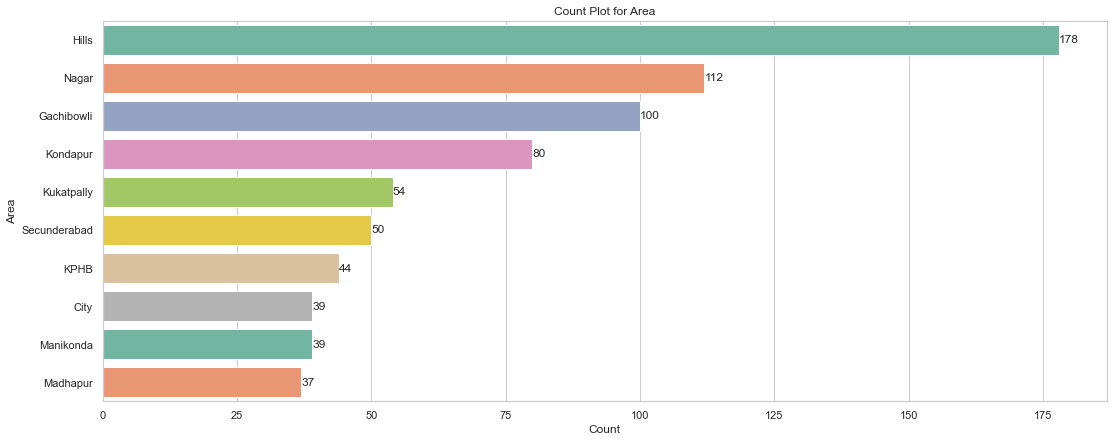

In [159]:
column_name = dataset['Area'].value_counts().nlargest(10)
plt.figure(figsize=(18, 7))

# Subplot 1: Count Plot
sns.set(style="whitegrid")
ax = sns.countplot(data=dataset, y='Area', order=column_name.index, palette='Set2')  # Order the y-axis based on value counts

plt.title(f'Count Plot for {column_name.name}')

# Add value counts above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.xlabel("Count")
plt.ylabel(column_name.name)
plt.show()


<span style='color:Blue'> *Observation:* </span>

- Highest number of doctor clinics are there in Jublee hills , banjara hills area followed by Himayat nagar, followed by Gacchibowli. 

## Consultation_fee column

In [160]:
print(dataset['Consultation_fee'].value_counts().to_dict())

{500.0: 363, 600.0: 190, 300.0: 182, 1000.0: 88, 400.0: 86, 800.0: 85, 700.0: 83, 200.0: 55, 550.0: 33, 650.0: 27, 900.0: 26, 350.0: 24, 750.0: 22, 450.0: 19, 100.0: 19, 1500.0: 16, 250.0: 15, 1200.0: 9, 150.0: 8, 680.0: 7, 950.0: 6, 2000.0: 5, 0.0: 4, 630.0: 3, 1100.0: 3, 1.0: 3, 50.0: 2, 3000.0: 2, 1250.0: 2, 51.0: 2, 99.0: 1, 850.0: 1, 49.0: 1, 375.0: 1, 2500.0: 1, 499.0: 1, 299.0: 1}


In [161]:
dataset['Consultation_fee'].describe()

count    1396.000000
mean      560.763610
std       280.208704
min         0.000000
25%       400.000000
50%       500.000000
75%       685.000000
max      3000.000000
Name: Consultation_fee, dtype: float64

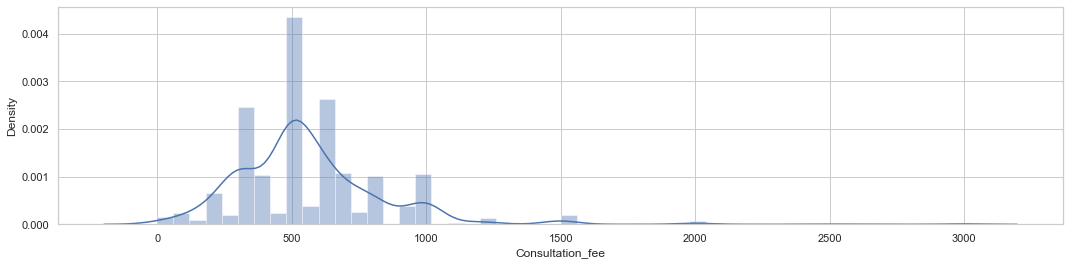

In [162]:
plt.figure(figsize=(18,4))
sns.distplot(dataset['Consultation_fee'])
plt.show()

<span style='color:Blue'> *Observation:* </span>

*Common Fee Ranges*: The most common consultation fee amounts in the dataset are around 500.0, 600.0, and 300.0, which appear frequently with counts of 227, 161, and 131, respectively.

*Variability in Fees:* The distribution indicates a wide range of consultation fees, spanning from as low as 49.0 to as high as 3000.0. This suggests that different doctors or medical practices have diverse pricing structures.

*Mid-Range Fees:* Fees in the mid-range, such as 500.0, 600.0, and 700.0, appear frequently. This could indicate that these fee amounts are considered standard or competitive within the healthcare market.

*Higher Fees:* There are instances of relatively higher fees, such as 1000.0, 1200.0, and 1500.0, albeit with lower frequencies. These could be associated with specialized services or experienced practitioners.

*Lower Fees:* Some lower fee amounts, like 100.0, 200.0, and 300.0, appear multiple times. These may represent initial consultation charges, discounted rates, or services that don't involve extensive procedures.

*Uncommon Fees:* Fee amounts like 2500.0, 3000.0, and 1100.0 have very low frequencies.

*Unique Fees:* Singular occurrences of fees like 49.0, 51.0, and 99.0 might be due to specific circumstances to serve patients.

Pricing Strategy: The distribution of fees could indicate a pricing strategy among healthcare providers, with certain fee amounts being strategically chosen based on perceived value or competitive positioning.





### Highest and Lowest consultation fees

In [163]:
# Retrieve records with highest consultation fees
highest_fees = dataset.nlargest(10, 'Consultation_fee') 

# Display the retrieved records
print("Records with Highest Consultation Fees:")
highest_fees

Records with Highest Consultation Fees:


,Name,Speciality,Years_of_Experience,Area,Consultation_fee,Patient_stories
712,Archana Satyam,General physician,11.0,Colony,3000.0,2.0
1175,B Kranthi Kiran,Psychiatrist,34.0,Hills,3000.0,44.0
570,G Harsha Vardhan Reddy,Gastroenterologist,8.0,Madhapur,2500.0,2.0
499,Shilpa Reddy Gill,Dermatologist,13.0,Hills,2000.0,NaN
769,Vimee Bindra,Gynecologist,15.0,Hills,2000.0,227.0
1167,Prabhakar Korada,Psychiatrist,48.0,Secunderabad,2000.0,10.0
1168,Nandini Bandikatla,Psychiatrist,23.0,Hills,2000.0,NaN
1170,MVR Sharma,Psychiatrist,44.0,Nagar,2000.0,3.0
134,Ramya P,Cardiology,11.0,Hills,1500.0,NaN
559,Subrahmaneswara Babu,Gastroenterologist,15.0,Secunderabad,1500.0,NaN


In [164]:

# Retrieve records with lowest consultation fees
lowest_fees = dataset.nsmallest(5, 'Consultation_fee')  


print("\nRecords with Lowest Consultation Fees:")
lowest_fees


Records with Lowest Consultation Fees:


,Name,Speciality,Years_of_Experience,Area,Consultation_fee,Patient_stories
36,Vtv,Ayurveda,23.0,Kachiguda,0.0,NaN
64,Usha,Ayurveda,15.0,Banjara Hills,0.0,NaN
1268,Ramana,Psychiatrist,39.0,Banjara Hills,0.0,NaN
1334,B,Physiotherapist,21.0,Vanasthalipuram,0.0,NaN
78,Vtv,Ayurveda,23.0,NaN,1.0,NaN


<span style='color:Blue'> *Observation:* </span>

- General physicians are charging the most , Ayurvedhic and Homeopathic doctors are charging lower fees.

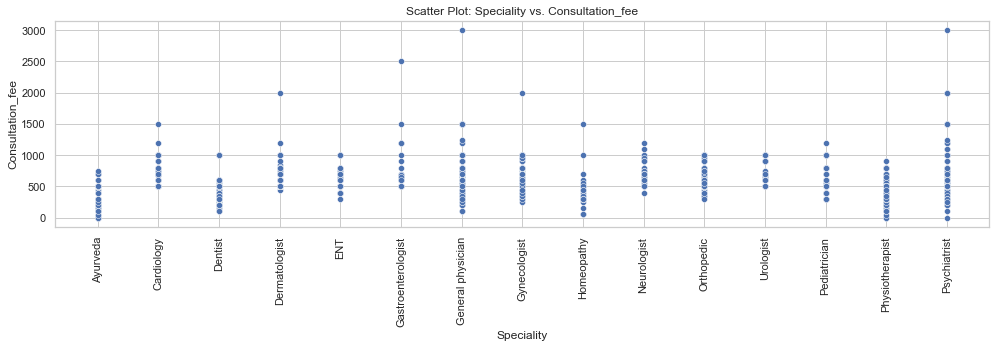

In [165]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data=dataset, x='Speciality', y='Consultation_fee',  palette='rocket')
plt.xticks(rotation=90)
plt.title('Scatter Plot: Speciality vs. Consultation_fee')
plt.tight_layout()
plt.show()

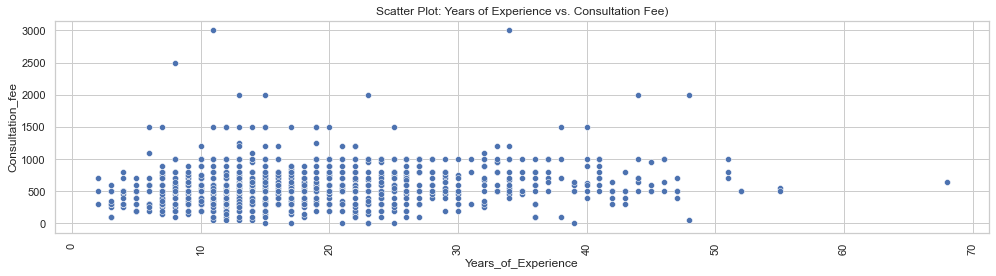

In [166]:
plt.figure(figsize=(14, 4))
sns.scatterplot(data=dataset, x='Years_of_Experience', y='Consultation_fee',  palette='Set2')
plt.xticks(rotation=90)
plt.title('Scatter Plot: Years of Experience vs. Consultation Fee)')
plt.tight_layout()
plt.show()

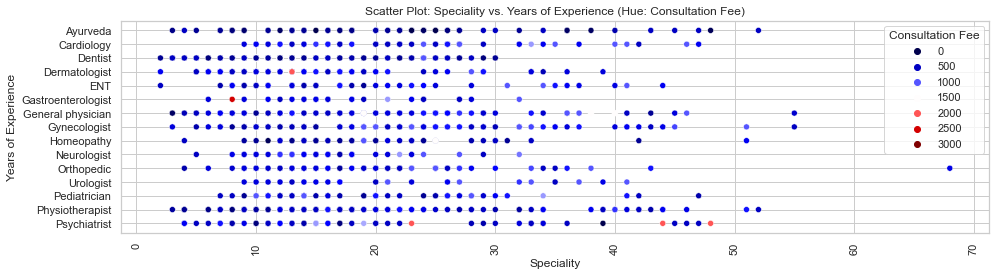

In [167]:

plt.figure(figsize=(14, 4))
sns.scatterplot(data=dataset, y='Speciality', x='Years_of_Experience', hue='Consultation_fee', palette='seismic')
plt.xticks(rotation=90)
plt.title('Scatter Plot: Speciality vs. Years of Experience (Hue: Consultation Fee)')
plt.xlabel('Speciality')
plt.ylabel('Years of Experience')
plt.legend(title='Consultation Fee')
plt.tight_layout()
plt.show()


In [168]:
dataset.describe()

,Years_of_Experience,Consultation_fee,Patient_stories
count,1407.000000,1396.000000,744.000000
mean,17.763326,560.763610,62.822581
std,9.483616,280.208704,134.322198
min,2.000000,0.000000,2.000000
25%,11.000000,400.000000,7.000000
50%,15.000000,500.000000,18.000000
75%,22.000000,685.000000,56.250000
max,68.000000,3000.000000,1221.000000


## Data preprocessing

In [169]:
# making a copy of dataset
df_doc = dataset.copy()

In [170]:
df_doc.isnull().sum()

Name                    16
Speciality               0
Years_of_Experience     51
Area                    99
Consultation_fee        62
Patient_stories        714
dtype: int64

In [171]:
# Calculate the mean of 'Consultation_fee'
mean_fee = df_doc['Consultation_fee'].mean()

# Impute missing values with the mean
df_doc['Consultation_fee'].fillna(mean_fee, inplace=True)

In [172]:
df_doc.isnull().sum()

Name                    16
Speciality               0
Years_of_Experience     51
Area                    99
Consultation_fee         0
Patient_stories        714
dtype: int64

In [173]:
dataset['Area'].unique()

array(['Ameerpet', 'Shaikpet', 'KPHB', 'Nagar', 'Kukatpally',
       'Bachupally', 'Manikonda', 'Erragadda', 'Colony', 'Lingampally',
       'Yousufguda', 'Hills', 'Secunderabad', 'Mehdipatnam', 'Hafeezpet',
       'Kothapet', nan, 'Sanjeeva Reddy Nagar', 'Malakpet', 'Neredmet',
       'Chaudhari Clinic  KPHB', 'Miyapur', 'Somajiguda', 'Santosh Nagar',
       'Punjagutta', 'Kachiguda', 'Vanasthalipuram', 'Meerpet',
       'Gachibowli', 'Puppalaguda', 'Moosapet', 'Koti', 'Khairatabad',
       'Rajendra Nagar', 'Kanchanbagh', 'Banjara Hills', 'Nallakunta',
       'Habsiguda', 'Kokapet', 'Dilsukhnagar', 'Karwan', 'Rampally',
       'Pragathi Nagar', 'Madinaguda', 'Basheerbagh', 'Attapur',
       'Hyderguda', 'Karmanghat', 'Isnapur', 'Karkhana', 'Moti Nagar',
       'City', 'Nallagandla', 'city', 'Kondapur', 'Nizampet', 'Nacharam',
       'Road', 'Khajaguda', 'Marredpally', 'Alwal', 'Tolichowki',
       'Borabanda', 'Malkajgiri', 'Balanagar', 'Begumpet', 'Mansoorabad',
       'Chintal', 'M

In [174]:


# Function to categorize the areas into zones
def categorize_area(area):
    east_zones = ['KPHB', 'Nagole', 'Dilsukhnagar', 'Mehdipatnam', 'Kothapet', 'L B Nagar', 'Hayathnagar', 'Vanasthalipuram', 'Neredmet', 'Toli Chowki',  'Moosapet', 'Sanath Nagar', 'Kapra', 'ECIL', 'Amberpet', 'Boduppal', 'Dammaiguda', 'Karmanghat', 'Nagole', 'Saidabad', 'Boduppal', 'Shivrampally',  'Saidabad', 'Karmanghat', 'Isnapur', 'Vanasthalipuram',  'Hayathnagar', 'Karwan', 'Rampally', 'Madinaguda', 'Kothapet', 'Habsiguda',  'Hyderguda', 'Karmanghat', 'Karkhana', 'Moti Nagar', 'Gachibowli', 'Puppalaguda', 'Moosapet', 'Lingampally', 'Basheerbagh', 'Attapur', 'Hyderguda', 'Karmanghat', 'Isnapur', 'Karkhana', 'Moti Nagar',  'Secunderabad, Hyderabad', 'city, Hyderabad', 'Kondapur, Hyderabad', 'Nizampet, Hyderabad', 'Kanchanbagh, Hyderabad', 'Nacharam, Hyderabad', 'Road, Hyderabad', 'Khajaguda, Hyderabad', 'Marredpally, Hyderabad', 'Karkhana, Hyderabad', 'Kokapet, Hyderabad', 'Alwal, Hyderabad', 'Tolichowki, Hyderabad', 'Borabanda, Hyderabad', 'Malkajgiri, Hyderabad', 'Balanagar, Hyderabad', 'Begumpet, Hyderabad', 'Mansoorabad, Hyderabad', 'Chintal, Hyderabad', 'Madhapur, Hyderabad', 'Nallakunta, Hyderabad', 'Madinaguda, Hyderabad', 'Mehdipatnam, Hyderabad', 'Vanasthalipuram, Hyderabad', 'Tarnaka, Hyderabad', 'Medipally, Hyderabad', 'BHEL, Hyderabad', 'Nanakramguda, Hyderabad', 'Kachiguda, Hyderabad', 'Dilsukhnagar, Hyderabad', 'Kapra, Hyderabad', 'Domalguda, Hyderabad', 'District, Hyderabad', 'Narsingi, Hyderabad', 'Sainikpuri, Hyderabad', 'Miyapur, Hyderabad', 'Kothapet, Hyderabad', 'Nagole, Hyderabad', 'Attapur, Hyderabad', 'Habsiguda, Hyderabad', 'Peerzadiguda, Hyderabad',  'Champapet, Hyderabad', 'Somajiguda, Hyderabad', 'Punjagutta, Hyderabad', 'Kushaiguda, Hyderabad', 'Hayathnagar, Hyderabad', 'Vidyanagar, Hyderabad', 'Chintalmet, Hyderabad', 'Narayanguda, Hyderabad', 'Ramkoti, Hyderabad', 'Ecil, Hyderabad', 'Circle, Hyderabad', 'Amberpet, Hyderabad', 'Kompally, Hyderabad', 'Chaitanyapuri, Hyderabad', 'Uppal, Hyderabad',  'Boduppal, Hyderabad', 'Dammaiguda, Hyderabad', 'Karmanghat, Hyderabad', 'Barkatpura, Hyderabad', 'Lakdikapul, Hyderabad', 'Bandlaguda, Hyderabad', 'Quthbullapur, Hyderabad', 'Ramanthapur, Hyderabad', 'Moosapet, Hyderabad', 'Bowenpally, Hyderabad', 'Houz, Hyderabad', 'Village, Hyderabad', 'Tank, Hyderabad', 'Trimulgherry, Hyderabad', 'Malakpet, Hyderabad', 'Medchal, Hyderabad', 'Meerpet, Hyderabad', 'Lothkunta, Hyderabad', 'Saidabad, Hyderabad', 'Balapur, Hyderabad', 'Shivrampally, Hyderabad', 'Nampally, Hyderabad', 'Toli Chowki',  'Masab Tank', 'Ameerpet', 'Himayath Nagar', 'Venkatapuram',  'ECIL',  'Kapra', 'Old Bowenpally', 'Vanaja Hospital', 'Sanath Nagar', 'Kompally', 'Shamshabad', 'MBBSPsychiatry Clinic', 'L B Nagar', 'Malkajgiri', 'Musheerabad',  'Domalguda', 'Jubilee Hills', 'Bowenpally', 'Sainikpuri', 'Chintalkunta']
    
    if area in east_zones:
        return 'East'
    elif area in ['Hills','District','Nizampet', 'Madhapur','Yousufguda', 'Erragadda', 'Kukatpally','Nallagandla',  'Erragadda, Hyderabad', 'City','Banjara Hills' ]:
        return 'West'
    elif area in ['Manikonda','Tolichowki','Hyderabad','Kokapet', 'Hyderguda', 'Nagar' ,'Santosh Nagar', 'Somajiguda', 'Shaikpet', 'Nampally']:
        return 'South'
    elif area in ['Secunderabad','City, Hyderabad','Nallakunta','Kondapur','Nanakramguda', 'Gachibowli, Hyderabad', 'Nallagandla, Hyderabad','Jubilee Hills', 'Lingampally','Jeedimetla, Hyderabad','Bachupally','Serilingampally, Hyderabad','Chanda Nagar', 'Jeedimetla','Colony','Chintal','Serilingampally','Narayanguda','Tarnaka', 'Miyapur','Nacharam', 'Begumpet', 'Malkajgiri', 'Chanda Nagar','Trimulgherry','Hafeezpet', 'Kushaiguda','Pragathi Nagar']:
        return 'North'
    else:
        return 'Central'

# Apply the categorize_area function to the 'Area' column and create a new 'Zone' column
df_doc['Zone'] = df_doc['Area'].apply(categorize_area)



In [175]:
df_doc.head()

,Name,Speciality,Years_of_Experience,Area,Consultation_fee,Patient_stories,Zone
0,M,Ayurveda,24.0,Ameerpet,500.0,65.0,East
1,C Narmada,Ayurveda,23.0,Shaikpet,500.0,18.0,South
2,Priti Thakre,Ayurveda,21.0,KPHB,500.0,11.0,East
3,Alivelu Manga,Ayurveda,25.0,Nagar,299.0,9.0,South
4,G,Ayurveda,18.0,Kukatpally,500.0,53.0,West


In [176]:
df_doc['Zone'].value_counts()

East       386
West       380
Central    279
North      227
South      186
Name: Zone, dtype: int64

In [177]:
# Filter the DataFrame to only include areas in the 'Other' zone
dict(df_doc[df_doc['Zone'] == 'Central']['Area'])


{23: nan,
 24: 'Sanjeeva Reddy Nagar',
 25: 'Malakpet',
 27: 'Chaudhari Clinic  KPHB',
 29: nan,
 32: 'Punjagutta',
 33: nan,
 34: nan,
 36: 'Kachiguda',
 37: nan,
 38: nan,
 39: 'Punjagutta',
 40: 'Kachiguda',
 43: nan,
 44: nan,
 45: 'Meerpet',
 49: nan,
 51: nan,
 52: nan,
 53: 'Koti',
 56: nan,
 58: 'Khairatabad',
 59: 'Rajendra Nagar',
 61: nan,
 63: 'Kanchanbagh',
 65: nan,
 69: nan,
 71: nan,
 75: nan,
 76: nan,
 78: nan,
 82: 'Khairatabad',
 84: nan,
 92: nan,
 93: nan,
 94: nan,
 96: nan,
 97: nan,
 99: nan,
 102: nan,
 142: 'city',
 146: 'Kanchanbagh',
 149: 'Kanchanbagh',
 160: 'Road',
 166: 'Khajaguda',
 167: 'Marredpally',
 173: 'Alwal',
 175: 'Borabanda',
 180: 'Balanagar',
 182: 'Mansoorabad',
 203: 'Marredpally',
 209: 'Road',
 218: 'Medipally',
 219: 'BHEL',
 223: 'Kachiguda',
 250: 'Narsingi',
 282: 'Marredpally',
 310: 'Peerzadiguda',
 319: 'Champapet',
 328: 'Punjagutta',
 343: 'Vidyanagar',
 346: 'Alwal',
 360: 'Marredpally',
 361: 'Chintalmet',
 367: 'Alwal',
 373

In [178]:
df_doc['Zone'].value_counts()

East       386
West       380
Central    279
North      227
South      186
Name: Zone, dtype: int64

In [179]:
df_doc.head()

,Name,Speciality,Years_of_Experience,Area,Consultation_fee,Patient_stories,Zone
0,M,Ayurveda,24.0,Ameerpet,500.0,65.0,East
1,C Narmada,Ayurveda,23.0,Shaikpet,500.0,18.0,South
2,Priti Thakre,Ayurveda,21.0,KPHB,500.0,11.0,East
3,Alivelu Manga,Ayurveda,25.0,Nagar,299.0,9.0,South
4,G,Ayurveda,18.0,Kukatpally,500.0,53.0,West


In [180]:
df= df_doc[[ 'Speciality','Zone', 'Years_of_Experience',  'Consultation_fee']]

In [181]:
df.head()

,Speciality,Zone,Years_of_Experience,Consultation_fee
0,Ayurveda,East,24.0,500.0
1,Ayurveda,South,23.0,500.0
2,Ayurveda,East,21.0,500.0
3,Ayurveda,South,25.0,299.0
4,Ayurveda,West,18.0,500.0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Speciality           1458 non-null   object 
 1   Zone                 1458 non-null   object 
 2   Years_of_Experience  1407 non-null   float64
 3   Consultation_fee     1458 non-null   float64
dtypes: float64(2), object(2)
memory usage: 45.7+ KB


In [183]:
df.corr()

,Years_of_Experience,Consultation_fee
Years_of_Experience,1.000000,0.181316
Consultation_fee,0.181316,1.000000


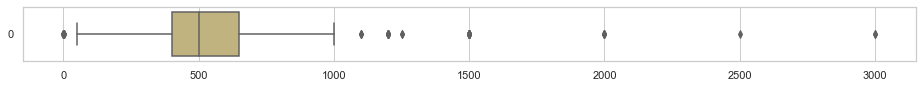

In [184]:
plt.figure(figsize=(16,1))
sns.boxplot(data=df['Consultation_fee'], orient='h' ,color='y')
plt.show()

In [185]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit
    return in_data

In [186]:
remove_outliers(df, 'Consultation_fee')

,Speciality,Zone,Years_of_Experience,Consultation_fee
0,Ayurveda,East,24.0,500.00000
1,Ayurveda,South,23.0,500.00000
2,Ayurveda,East,21.0,500.00000
3,Ayurveda,South,25.0,299.00000
4,Ayurveda,West,18.0,500.00000
...,...,...,...,...
1453,Physiotherapist,East,18.0,500.00000
1454,Physiotherapist,Central,24.0,450.00000
1455,Physiotherapist,East,25.0,560.76361
1456,Physiotherapist,North,24.0,650.00000


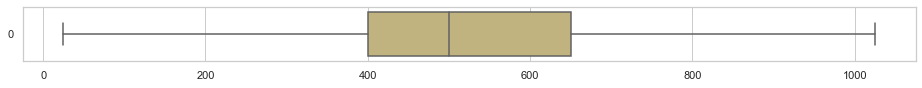

In [187]:
plt.figure(figsize=(16,1))
sns.boxplot(data=df['Consultation_fee'], orient='h' ,color='y')
plt.show()

In [188]:
df.head()

,Speciality,Zone,Years_of_Experience,Consultation_fee
0,Ayurveda,East,24.0,500.0
1,Ayurveda,South,23.0,500.0
2,Ayurveda,East,21.0,500.0
3,Ayurveda,South,25.0,299.0
4,Ayurveda,West,18.0,500.0


In [189]:
df.isnull().sum()

Speciality              0
Zone                    0
Years_of_Experience    51
Consultation_fee        0
dtype: int64

In [223]:
# Fill missing values in 'Years_of_Experience' with the mean of the column
mean_experience = df['Years_of_Experience'].mode()
df['Years_of_Experience'].fillna(mean_experience, inplace=True)

In [191]:
df.isnull().sum()

Speciality             0
Zone                   0
Years_of_Experience    0
Consultation_fee       0
dtype: int64

In [192]:
# Resample each specialty class to have 500 samples
resampled_dfs = []
for specialty in df['Speciality'].unique():
    specialty_df = df[df['Speciality'] == specialty]
    oversampled_df = specialty_df.sample(n=1000, replace=True)
    resampled_dfs.append(oversampled_df)

resampled_df = pd.concat(resampled_dfs)

# Print the value counts to verify
print(resampled_df['Speciality'].value_counts())

Ayurveda              1000
Cardiology            1000
Dentist               1000
Dermatologist         1000
ENT                   1000
Gastroenterologist    1000
General physician     1000
Gynecologist          1000
Homeopathy            1000
Neurologist           1000
Orthopedic            1000
Urologist             1000
Pediatrician          1000
Physiotherapist       1000
Psychiatrist          1000
Name: Speciality, dtype: int64


In [224]:
resampled_df.head()

,Speciality,Zone,Years_of_Experience,Consultation_fee
42,Ayurveda,West,13.000000,700.0
80,Ayurveda,North,17.763326,500.0
34,Ayurveda,Central,3.000000,250.0
19,Ayurveda,North,22.000000,200.0
47,Ayurveda,East,4.000000,500.0


In [194]:
df1 = resampled_df.copy()

In [195]:
df1.shape

(15000, 4)

In [196]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [197]:
X = df1.drop(columns=['Consultation_fee'],axis=1)

In [198]:
y= df1['Consultation_fee']

In [199]:
print(X.shape, y.shape)

(15000, 3) (15000,)


In [200]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [201]:
num_features

Index(['Years_of_Experience'], dtype='object')

In [202]:
cat_features

Index(['Speciality', 'Zone'], dtype='object')

In [203]:
from sklearn.decomposition import PCA

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features)
    ]
)

# Adding PCA to the pipeline
pca = PCA(n_components=2)  

final_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("pca", pca)
    ]
)


In [204]:
X = preprocessor.fit_transform(X)

In [205]:
X.shape

(15000, 21)

In [206]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)
X_train.shape, X_test.shape

((11250, 21), (3750, 21))

In [207]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    # Calculate Adjusted R2
    n = len(true)
    p = X_train.shape[1]  # Number of predictors
    adjusted_r2 = 1 - ((1 - r2_square) * (n - 1) / (n - p - 1))
    
    return mae, rmse, r2_square, adjusted_r2

In [208]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boost Regressor":GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
adjusted_r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    (
        model_train_mae,
        model_train_rmse,
        model_train_r2,
        model_train_adjusted_r2,
    ) = evaluate_model(y_train, y_train_pred)

    (
        model_test_mae,
        model_test_rmse,
        model_test_r2,
        model_test_adjusted_r2,
    ) = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Adjusted R2: {:.4f}".format(model_train_adjusted_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Adjusted R2: {:.4f}".format(model_test_adjusted_r2))
    
    r2_list.append(model_test_r2)
    adjusted_r2_list.append(model_test_adjusted_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 172.5541
- Mean Absolute Error: 136.6494
- R2 Score: 0.3775
- Adjusted R2: 0.3763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 171.1745
- Mean Absolute Error: 135.4232
- R2 Score: 0.3940
- Adjusted R2: 0.3906


Lasso
Model performance for Training set
- Root Mean Squared Error: 173.1161
- Mean Absolute Error: 137.0720
- R2 Score: 0.3734
- Adjusted R2: 0.3723
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 171.7729
- Mean Absolute Error: 136.0426
- R2 Score: 0.3898
- Adjusted R2: 0.3864


Ridge
Model performance for Training set
- Root Mean Squared Error: 172.5542
- Mean Absolute Error: 136.6466
- R2 Score: 0.3775
- Adjusted R2: 0.3763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 171.1764
- Mean Absolute Error: 135.4235
- R2 Score: 0.3940
- Adjusted R2: 0.3906


K-Neigh

In [209]:
pd.DataFrame(list(zip(model_list, r2_list, adjusted_r2_list)), columns=['Model Name', 'R2_Score', 'Adjusted R2 score'])

,Model Name,R2_Score,Adjusted R2 score
0,Linear Regression,0.394037,0.390624
1,Lasso,0.389794,0.386356
2,Ridge,0.394024,0.390611
3,K-Neighbors Regressor,0.785306,0.784096
4,Decision Tree,0.832006,0.831059
5,Random Forest Regressor,0.831794,0.830847
6,Gradient Boost Regressor,0.502998,0.500198
7,XGBRegressor,0.812359,0.811302
8,AdaBoost Regressor,0.250132,0.245908


In [210]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Decision Tree,0.832006
5,Random Forest Regressor,0.831794
7,XGBRegressor,0.812359
3,K-Neighbors Regressor,0.785306
6,Gradient Boost Regressor,0.502998
0,Linear Regression,0.394037
2,Ridge,0.394024
1,Lasso,0.389794
8,AdaBoost Regressor,0.250132


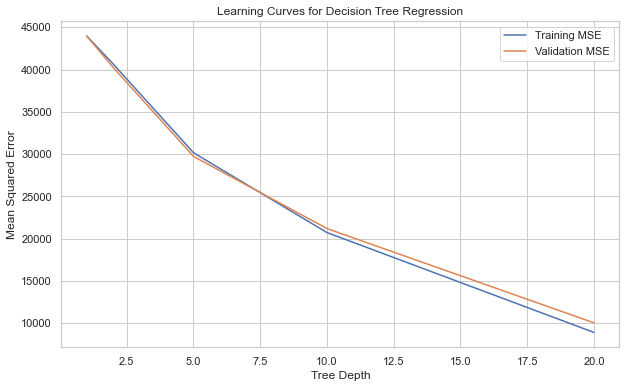

In [211]:


# Train Decision Tree regressor models with different depths
train_errors = []
val_errors = []

depths = [1, 2, 5, 10, 20]
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    train_errors.append(mean_squared_error(y_train, train_predictions))
    
    val_predictions = model.predict(X_test)
    val_errors.append(mean_squared_error(y_test, val_predictions))

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training MSE')
plt.plot(depths, val_errors, label='Validation MSE')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Decision Tree Regression')
plt.legend()
plt.show()


# Hyperparameter Tuning

In [68]:

# Define the hyperparameter grid for Decision Tree Regressor
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Define the hyperparameter grid for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
     }

model_list = []
r2_list = []

for i, model_name in enumerate(models):
    model = models[model_name]

    if model_name == "Decision Tree":
        # Perform hyperparameter tuning using GridSearchCV for Decision Tree Regressor
        grid_search = GridSearchCV(model, param_grid=dt_param_grid, cv=5, n_jobs=-1)
    
    elif model_name == "Random Forest Regressor":
        # Perform hyperparameter tuning using GridSearchCV for Random Forest Regressor
        grid_search = GridSearchCV(model, param_grid=rf_param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_  # Reassign the model with the best estimator found by GridSearchCV

    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2, model_train_adjusted_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2, model_test_adjusted_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Adjusted R2: {:.4f}".format(model_train_adjusted_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Adjusted R2: {:.4f}".format(model_test_adjusted_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 84.2918
- Mean Absolute Error: 41.6055
- R2 Score: 0.8555
- Adjusted R2: 0.8241
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 93.1624
- Mean Absolute Error: 47.6527
- R2 Score: 0.8251
- Adjusted R2: 0.8241


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 84.3985
- Mean Absolute Error: 42.0383
- R2 Score: 0.8551
- Adjusted R2: 0.8236
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 93.2946
- Mean Absolute Error: 48.3748
- R2 Score: 0.8246
- Adjusted R2: 0.8236




In [69]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Decision Tree,0.825089
1,Random Forest Regressor,0.824592


In [217]:
# Creating a Decision Tree Regressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train) # Train model

    # Make predictions
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)


# Evaluate Train and Test dataset
(
        model_train_mae,
        model_train_rmse,
        model_train_r2,
        model_train_adjusted_r2,
    ) = evaluate_model(y_train, y_train_pred)

(
        model_test_mae,
        model_test_rmse,
        model_test_r2,
        model_test_adjusted_r2,
    ) = evaluate_model(y_test, y_test_pred)



print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print("- Adjusted R2: {:.4f}".format(model_train_adjusted_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))
print("- Adjusted R2: {:.4f}".format(model_test_adjusted_r2))
    

print('=' * 35)
print('\n')


Model performance for Training set
- Root Mean Squared Error: 84.8134
- Mean Absolute Error: 41.9549
- R2 Score: 0.8496
- Adjusted R2: 0.8493
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 90.1287
- Mean Absolute Error: 46.0222
- R2 Score: 0.8320
- Adjusted R2: 0.8311




In [218]:
# Pickling the trained model
import pickle


model_filename = 'DT_model.sav'
with open(model_filename, 'wb') as file:
    pickle.dump(DT_model, file)

print("Model saved as", model_filename)

Model saved as DT_model.sav


In [219]:

# load the model from disk
# Load the pickled model

model_filename = 'DT_model.sav'
with open(model_filename, 'rb') as file:
    loaded_regressor = pickle.load(file)